In [27]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
pd.set_option('display.max_columns', None)

### Loading Data

In [8]:
with open("./data/blood_donation_retention.parquet", "wb") as file:
    res = requests.get("https://dub.sh/ds-data-granular", allow_redirects=True)
    file.write(res.content)
dono_retention_df = pd.read_parquet("./data/blood_donation_retention.parquet", engine="auto")

In [9]:
aggregate_data_links = [
    "https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/donations_facility.csv",
    "https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/donations_state.csv",
    "https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/newdonors_facility.csv",
    "https://raw.githubusercontent.com/MoH-Malaysia/data-darah-public/main/newdonors_state.csv"
]

for link in aggregate_data_links:
    res = requests.get(link)
    filename = link.split("/")[-1]
    with open(f"./data/{filename}", "wb") as file:
        file.write(res.content)

dono_fac_df = pd.read_csv("./data/donations_facility.csv")
dono_state_df = pd.read_csv("./data/donations_state.csv")
newdono_fac_df = pd.read_csv("./data/newdonors_facility.csv")
newdono_state_df = pd.read_csv("./data/newdonors_state.csv")

### Looking at data

In [28]:
print(dono_fac_df.shape, dono_state_df.shape, newdono_fac_df.shape, newdono_state_df.shape)

(145046, 19) (92302, 19) (145046, 13) (92302, 13)


In [29]:
dono_retention_df.head()

,donor_id,visit_date,birth_date
0,00000,2013-11-03,1964
1,00000,2014-05-26,1964
2,00000,2015-01-25,1964
3,00000,2015-08-09,1964
4,00000,2016-03-10,1964


In [30]:
dono_fac_df.head()

,date,hospital,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
0,2006-01-01,Hospital Sultanah Nora Ismail,87,19,20,45,3,87,0,87,0,0,0,86,1,0,36,49,2
1,2006-01-01,Hospital Sultanah Aminah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2006-01-01,Hospital Sultanah Bahiyah,208,67,62,61,18,208,0,208,0,0,0,197,8,3,1,207,0
3,2006-01-01,Hospital Raja Perempuan Zainab II,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006-01-01,Hospital Melaka,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0


In [31]:
dono_state_df.head()

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
0,2006-01-01,Malaysia,525,152,139,194,40,308,217,525,0,0,0,496,18,11,243,277,5
1,2006-01-02,Malaysia,227,53,43,112,19,162,65,217,6,4,0,224,2,1,83,143,1
2,2006-01-03,Malaysia,112,29,21,56,6,112,0,89,10,13,0,105,2,5,8,101,3
3,2006-01-04,Malaysia,391,92,98,165,36,145,246,371,4,16,0,316,71,4,286,102,3
4,2006-01-05,Malaysia,582,149,198,193,42,371,211,548,17,17,0,555,19,8,328,250,4


In [32]:
newdono_fac_df.head()

,date,hospital,17-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,other,total
0,2006-01-01,Hospital Sultanah Nora Ismail,21,2,2,3,6,1,0,0,1,0,36
1,2006-01-01,Hospital Sultanah Aminah,0,0,0,0,0,0,0,0,0,0,0
2,2006-01-01,Hospital Sultanah Bahiyah,0,0,0,1,0,0,0,0,0,0,1
3,2006-01-01,Hospital Raja Perempuan Zainab II,0,0,0,0,0,0,0,0,0,0,0
4,2006-01-01,Hospital Melaka,0,0,0,0,0,0,0,0,0,0,0


In [33]:
newdono_state_df.head()

,date,state,17-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,other,total
0,2006-01-01,Malaysia,124,31,31,18,24,7,5,2,1,0,243
1,2006-01-02,Malaysia,16,15,11,8,19,6,6,2,0,0,83
2,2006-01-03,Malaysia,1,2,1,2,1,0,0,1,0,0,8
3,2006-01-04,Malaysia,171,35,27,13,16,16,6,1,0,1,286
4,2006-01-05,Malaysia,219,41,22,13,16,8,8,1,0,0,328


In [34]:
newdono_state_df[newdono_state_df["state"] == "Malaysia"]

,date,state,17-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,other,total
0,2006-01-01,Malaysia,124,31,31,18,24,7,5,2,1,0,243
1,2006-01-02,Malaysia,16,15,11,8,19,6,6,2,0,0,83
2,2006-01-03,Malaysia,1,2,1,2,1,0,0,1,0,0,8
3,2006-01-04,Malaysia,171,35,27,13,16,16,6,1,0,1,286
4,2006-01-05,Malaysia,219,41,22,13,16,8,8,1,0,0,328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6588,2024-01-15,Malaysia,152,40,28,21,14,6,4,2,0,0,267
6589,2024-01-16,Malaysia,136,68,29,29,19,23,9,4,2,0,319
6590,2024-01-17,Malaysia,160,67,57,77,39,23,13,3,0,0,439
6591,2024-01-18,Malaysia,140,104,70,62,20,10,7,3,0,0,416


### Feature Engineering

In [10]:
dono_fac_df = dono_fac_df.assign(year=pd.to_datetime(dono_fac_df["date"]).dt.year)
dono_fac_df = dono_fac_df.assign(month=pd.to_datetime(dono_fac_df["date"]).dt.month)
dono_fac_df = dono_fac_df.assign(day_of_year=pd.to_datetime(dono_fac_df["date"]).dt.dayofyear)
dono_fac_df.head(3)

,date,hospital,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular,year,month,day_of_year
0,2006-01-01,Hospital Sultanah Nora Ismail,87,19,20,45,3,87,0,87,0,0,0,86,1,0,36,49,2,2006,1,1
1,2006-01-01,Hospital Sultanah Aminah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2006,1,1
2,2006-01-01,Hospital Sultanah Bahiyah,208,67,62,61,18,208,0,208,0,0,0,197,8,3,1,207,0,2006,1,1


In [11]:
dono_state_df = dono_state_df.assign(year=pd.to_datetime(dono_state_df["date"]).dt.year)
dono_state_df = dono_state_df.assign(month=pd.to_datetime(dono_state_df["date"]).dt.month)
dono_state_df = dono_state_df.assign(day_of_year=pd.to_datetime(dono_state_df["date"]).dt.dayofyear)
dono_state_df.head(3)

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular,year,month,day_of_year
0,2006-01-01,Malaysia,525,152,139,194,40,308,217,525,0,0,0,496,18,11,243,277,5,2006,1,1
1,2006-01-02,Malaysia,227,53,43,112,19,162,65,217,6,4,0,224,2,1,83,143,1,2006,1,2
2,2006-01-03,Malaysia,112,29,21,56,6,112,0,89,10,13,0,105,2,5,8,101,3,2006,1,3


In [12]:
newdono_fac_df = newdono_fac_df.assign(year=pd.to_datetime(newdono_fac_df["date"]).dt.year)
newdono_fac_df = newdono_fac_df.assign(month=pd.to_datetime(newdono_fac_df["date"]).dt.month)
newdono_fac_df = newdono_fac_df.assign(day_of_year=pd.to_datetime(newdono_fac_df["date"]).dt.dayofyear)
newdono_fac_df.head(3)

,date,hospital,17-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,other,total,year,month,day_of_year
0,2006-01-01,Hospital Sultanah Nora Ismail,21,2,2,3,6,1,0,0,1,0,36,2006,1,1
1,2006-01-01,Hospital Sultanah Aminah,0,0,0,0,0,0,0,0,0,0,0,2006,1,1
2,2006-01-01,Hospital Sultanah Bahiyah,0,0,0,1,0,0,0,0,0,0,1,2006,1,1


In [13]:
newdono_state_df = newdono_state_df.assign(year=pd.to_datetime(newdono_state_df["date"]).dt.year)
newdono_state_df = newdono_state_df.assign(month=pd.to_datetime(newdono_state_df["date"]).dt.month)
newdono_state_df = newdono_state_df.assign(day_of_year=pd.to_datetime(newdono_state_df["date"]).dt.dayofyear)
newdono_state_df.head(3)

,date,state,17-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,other,total,year,month,day_of_year
0,2006-01-01,Malaysia,124,31,31,18,24,7,5,2,1,0,243,2006,1,1
1,2006-01-02,Malaysia,16,15,11,8,19,6,6,2,0,0,83,2006,1,2
2,2006-01-03,Malaysia,1,2,1,2,1,0,0,1,0,0,8,2006,1,3


In [14]:
dono_retention_df = dono_retention_df.assign(visit_year=pd.to_datetime(dono_retention_df["visit_date"]).dt.year)
dono_retention_df = dono_retention_df.assign(visit_date=pd.to_datetime(dono_retention_df["visit_date"]))
dono_retention_df.head(3)

,donor_id,visit_date,birth_date,visit_year
0,00000,2013-11-03,1964,2013
1,00000,2014-05-26,1964,2014
2,00000,2015-01-25,1964,2015


### Plotting aggregates

#### Donation Facilities

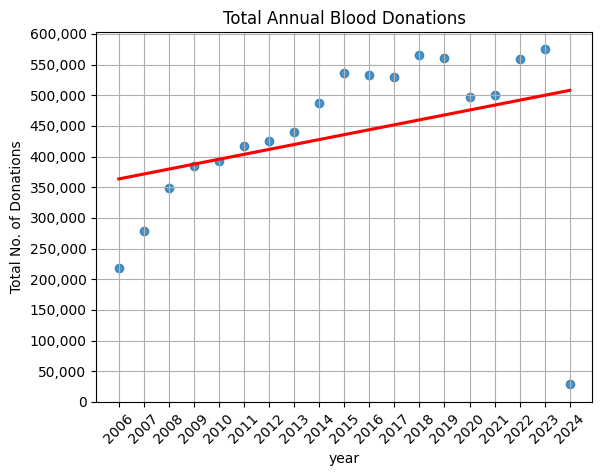

In [36]:
sns.regplot(
    x=dono_fac_df["year"].drop_duplicates(),
    y=dono_fac_df.groupby("year")["daily"].agg("sum"),
    ci=False,
    line_kws={"color": "red"}
)
plt.xticks(dono_fac_df["year"].unique(), rotation=45)
plt.yticks(list(range(0, 600_001, 50_000)))
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(True)
plt.title("Total Annual Blood Donations")
plt.xlabel("Year")
plt.ylabel("Total No. of Donations")
plt.savefig("./data/Total Annual Blood Donations.png", bbox_inches="tight")

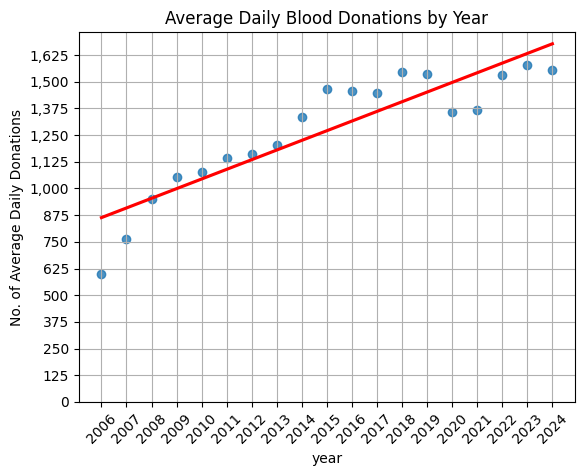

In [37]:
sns.regplot(
    x=dono_fac_df["year"].drop_duplicates(),
    y=dono_fac_df.groupby("year")["daily"].agg("sum")/dono_fac_df.groupby("year")["day_of_year"].agg("max"),
    ci=False,
    line_kws={"color": "red"}
)
plt.xticks(dono_fac_df["year"].unique(), rotation=45)
plt.yticks(list(range(0, 1700, 125)))
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(True)
plt.title("Average Daily Blood Donations by Year")
plt.xlabel("Year")
plt.ylabel("No. of Average Daily Donations")
plt.savefig("./data/Average Daily Blood Donations.png", bbox_inches="tight")

#### Donations States

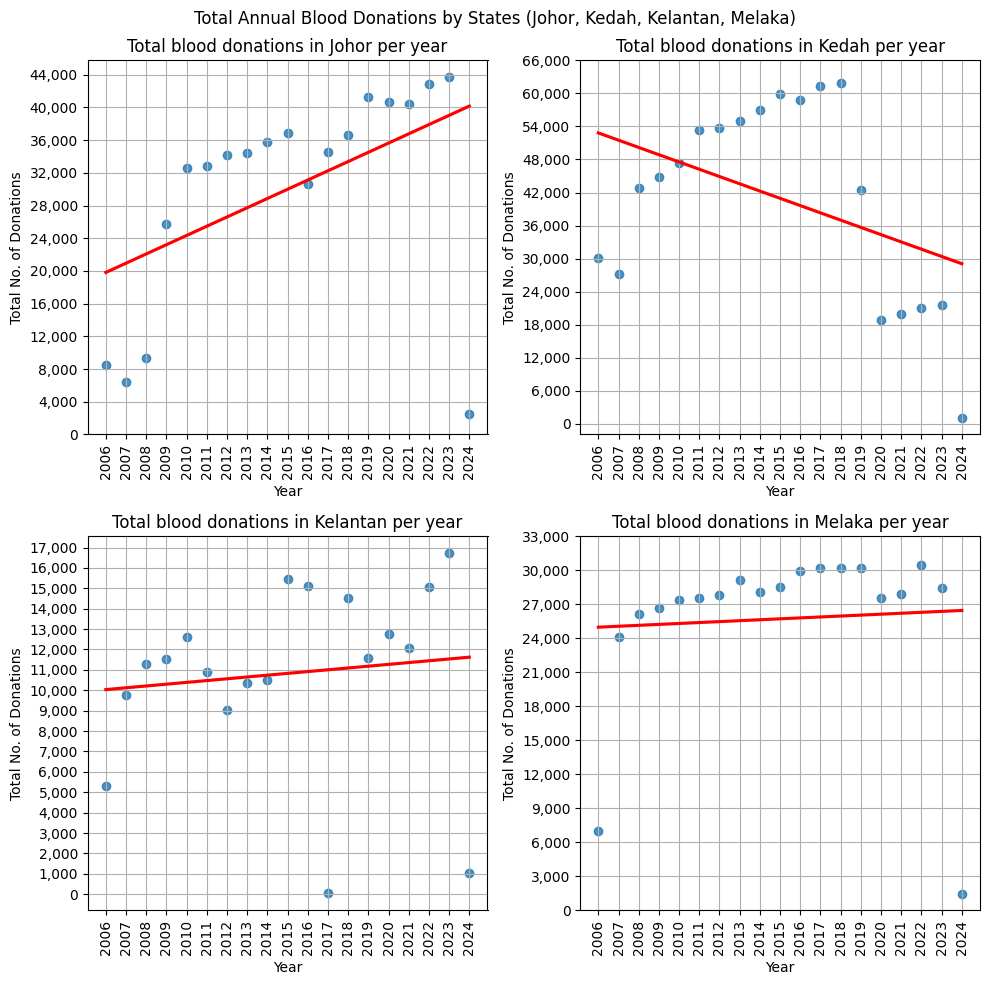

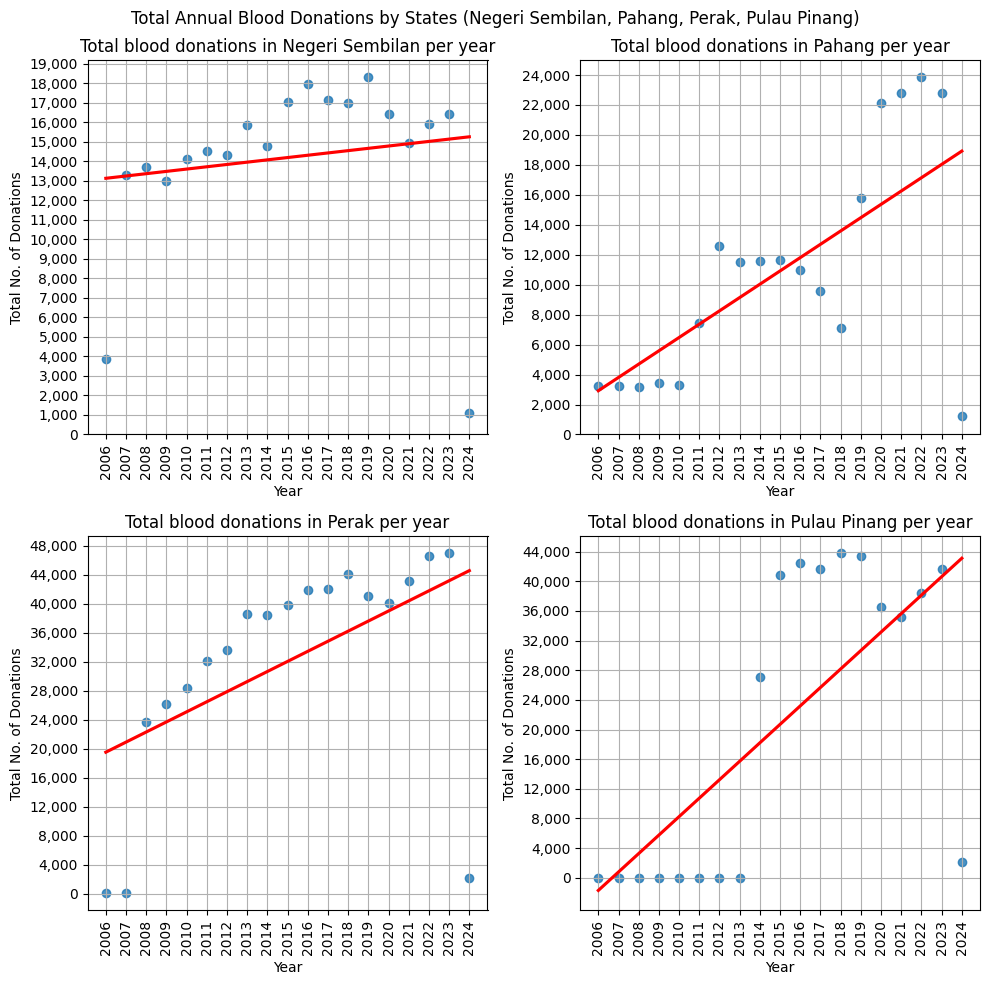

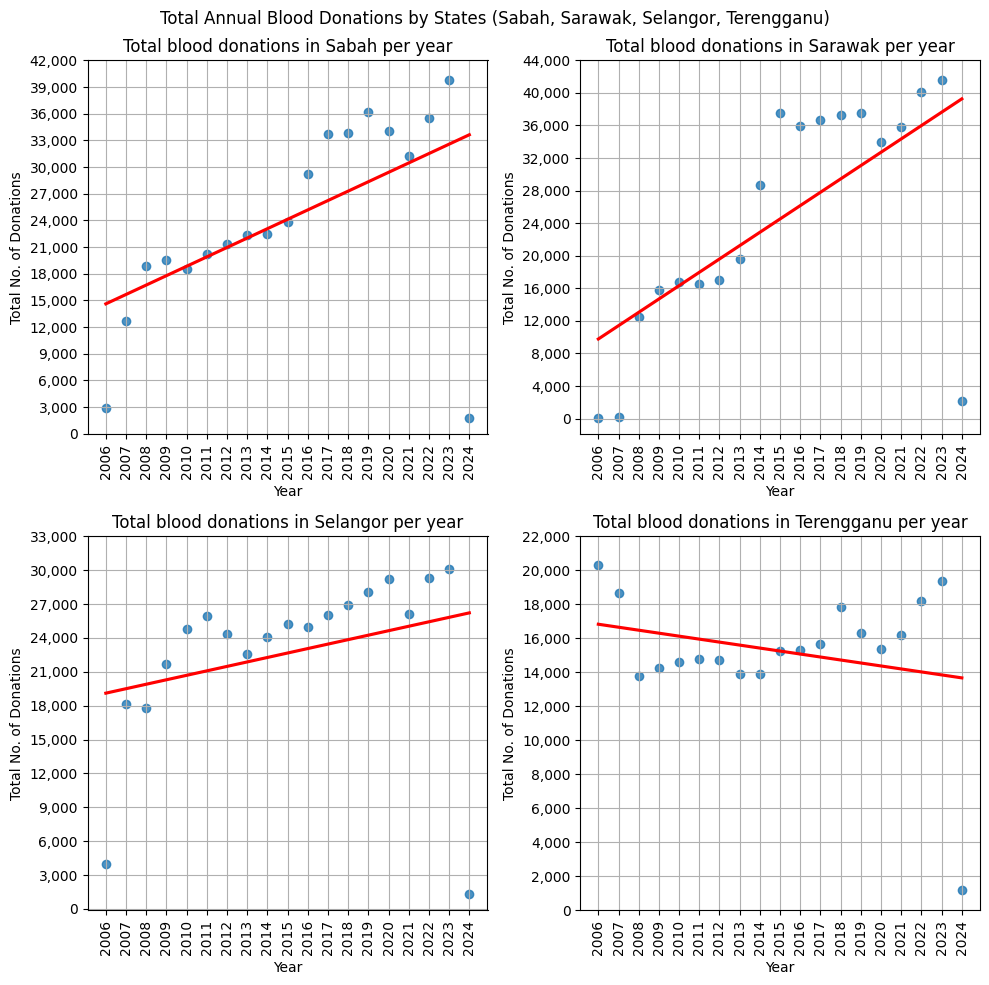

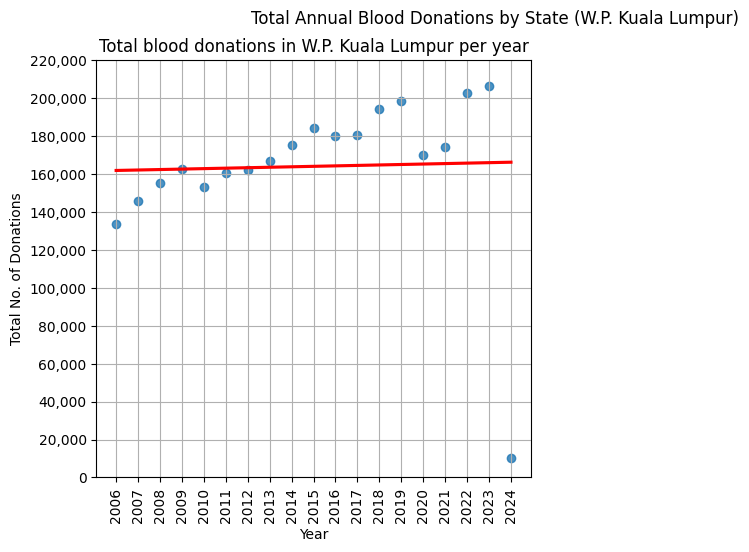

<Figure size 1000x1000 with 0 Axes>

In [58]:
plt.figure(figsize=(10, 10))

state_lst = []
for idx, state in enumerate(dono_state_df["state"].unique()[1:]):
    if idx > 0 and idx % 4 == 0:
        plt.suptitle(f"Total Annual Blood Donations by State{'s'*(len(state_lst)>1)} ({', '.join(state_lst)})")
        plt.tight_layout()
        plt.savefig(f"./data/State Donation Breakdown ({', '.join(state_lst)}).png", bbox_inches="tight")
        plt.figure(figsize=(10, 10))
        state_lst = []

    state_lst.append(state)
    plt.subplot2grid((2, 2), (idx//2%2, idx%2))
    state_data = dono_state_df[dono_state_df["state"] == state]

    x = state_data["year"].drop_duplicates()
    y = state_data.groupby("year")["daily"].agg("sum")
    max_val = str(max(y))
    y_tick = int(max_val[0]+"0"*(len(max_val)-2))

    sns.regplot(x=x, y=y, ci=False, line_kws={"color": "red"})
    plt.title(f"Total blood donations in {state} per year")
    plt.xticks(state_data["year"].unique(), rotation=90)
    plt.yticks(list(range(0, int(max_val)+y_tick+1, y_tick)))
    plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.xlabel("Year")
    plt.ylabel("Total No. of Donations")
    plt.grid(True)
else:
    plt.suptitle(f"Total Annual Blood Donations by State{'s'*(len(state_lst)>1)} ({', '.join(state_lst)})")
    plt.tight_layout()
    plt.savefig(f"./data/State Donation Breakdown ({', '.join(state_lst)}).png", bbox_inches="tight")
    plt.figure(figsize=(10, 10))

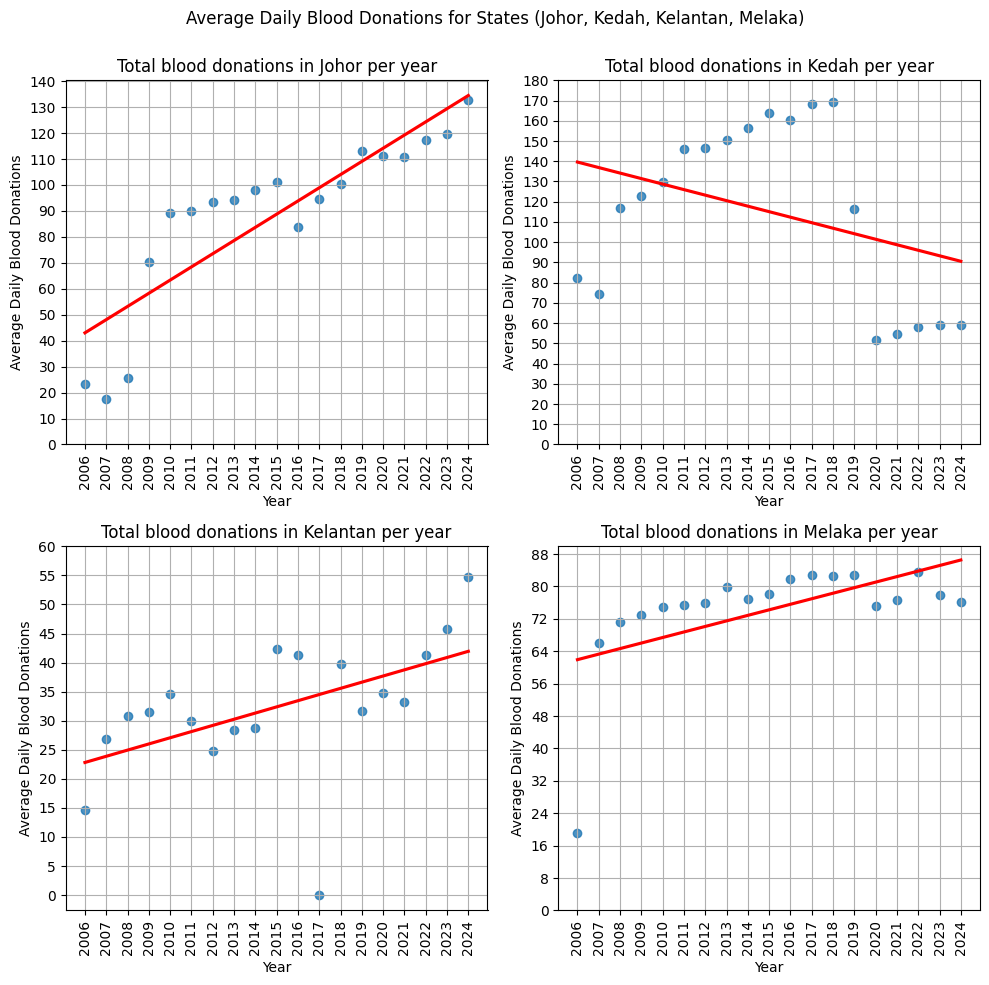

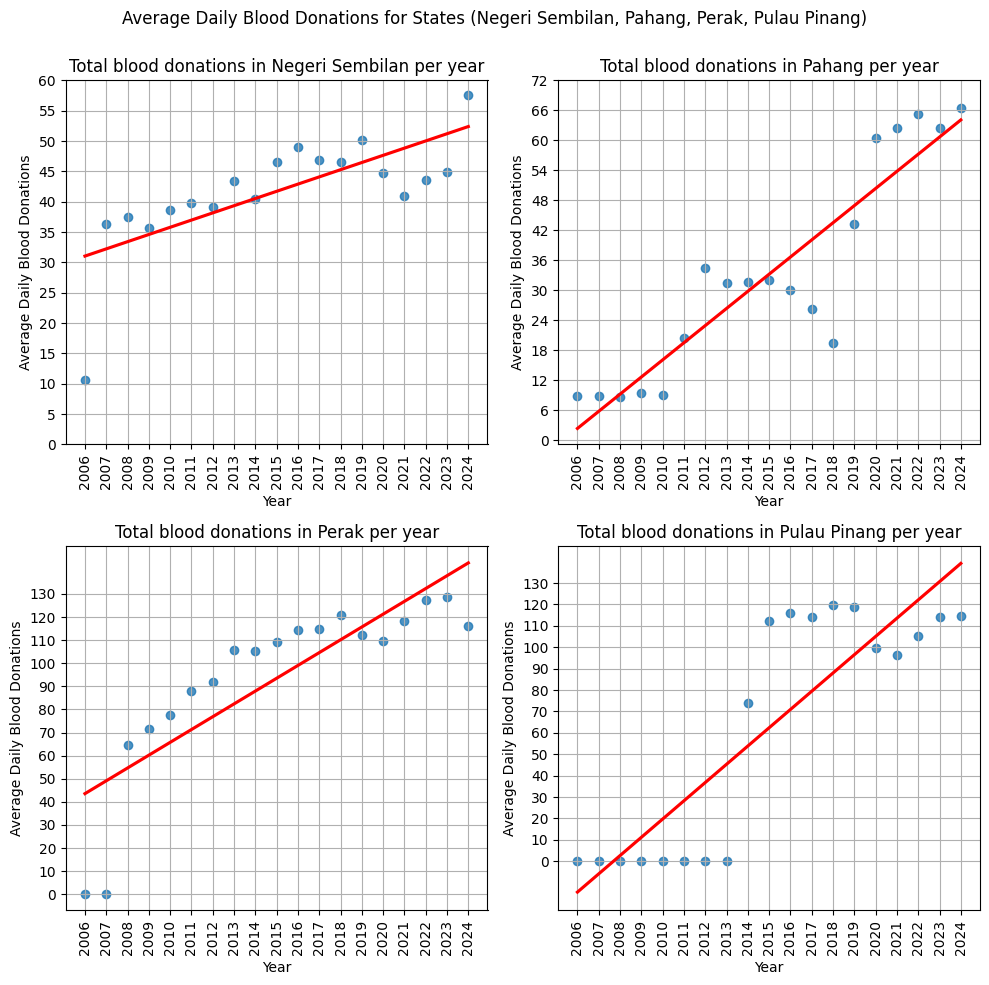

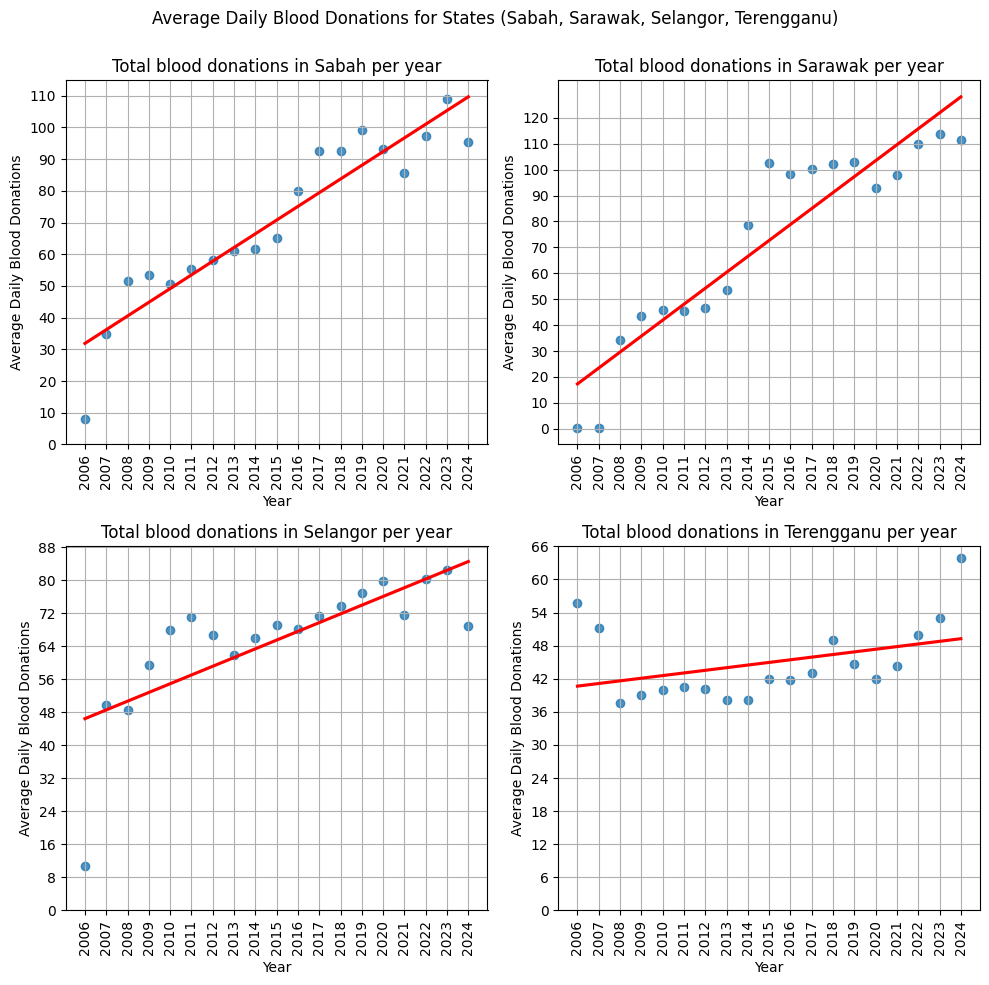

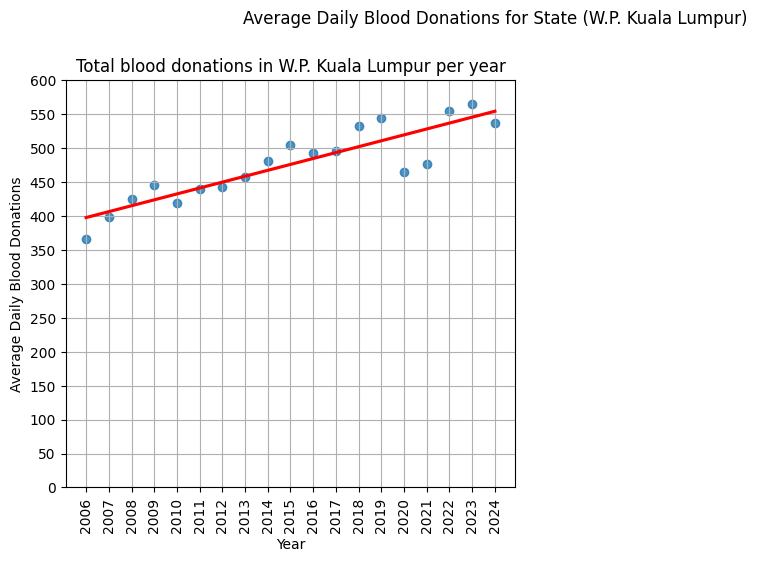

In [59]:
plt.figure(figsize=(10, 10))

state_lst = []
for idx, state in enumerate(dono_state_df["state"].unique()[1:]):
    if idx > 0 and idx % 4 == 0:
        plt.suptitle(f"Average Daily Blood Donations for State{'s'*(len(state_lst)>1)} ({', '.join(state_lst)})")
        plt.tight_layout(rect=[0, 0, 1, 0.98])
        plt.savefig(f"./data/State Daily Donation Breakdown ({', '.join(state_lst)}).png", bbox_inches="tight")
        plt.figure(figsize=(10, 10))
        state_lst = []

    state_lst.append(state)
    plt.subplot2grid((2, 2), (idx//2%2, idx%2))
    state_data = dono_state_df[dono_state_df["state"] == state]

    x = state_data["year"].drop_duplicates()
    y = state_data.groupby("year")["daily"].agg("sum")/state_data.groupby("year")["day_of_year"].agg("max")
    max_val = str(round(max(y)))
    y_tick = int(max_val[0]+"0"*(len(max_val)-2))

    sns.regplot(x=x, y=y, ci=False, line_kws={"color": "red"})
    plt.title(f"Total blood donations in {state} per year")
    plt.xticks(state_data["year"].unique(), rotation=90)
    plt.yticks(list(range(0, int(max_val)+y_tick+1, y_tick)))
    plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.xlabel("Year")
    plt.ylabel("Average Daily Blood Donations")
    plt.grid(True)
else:
    plt.suptitle(f"Average Daily Blood Donations for State{'s'*(len(state_lst)>1)} ({', '.join(state_lst)})")
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.savefig(f"./data/State Daily Donation Breakdown ({', '.join(state_lst)}).png", bbox_inches="tight")

#### Recurring Donors

In [44]:
dono_years = dono_retention_df.groupby("donor_id").agg(first_visit=("visit_date", "min"), last_visit=("visit_date", "max"))
repeat_donors = dono_years[dono_years["first_visit"] != dono_years["last_visit"]]

In [45]:
print(f"Percentage of repeat donors: {100*repeat_donors.shape[0]/dono_retention_df['donor_id'].unique().shape[0]:.2f}%")

Percentage of repeat donors: 47.90%


In [46]:
print(f"Average number of blood donations for repeat donors: {dono_retention_df[dono_retention_df['donor_id'].isin(repeat_donors.index)].shape[0]/repeat_donors.shape[0]}")

Average number of blood donations for repeat donors: 4.7160129343262565
